In [21]:
"""
        SETUP ENVIRONMENT

Choose a game:
- "Cart" # ok for 100 epoch
- "Car" # not good choice
- "Pendulum" # not good choice
- "Lake" # demand more then 1500 epoch
- "Maze" # 100 epoch is OK
- "Toy" # 100 epoch
"""
GAME_NAME = "Toy"
"""
        SETUP AGENT and TRAINING (FEED FORWARD)
"""
"""REINFORCE"""
BETA_REIN_1 = 1 #Betas are scalar by which we multiply bias terms in NN at initialization.
BETA_REIN_2 = 0.1 #They are used to control Chaos order.
LEARNING_RATE_REIN = 0.001
HORIZON_REIN = 5
HIDDEN_DIM_REIN = 32
"""MATRYOSHKA"""
BETA_MTR = 0.1
LEARNING_RATE_MTR = 0.001
HORIZON_MTR= 5
HIDDEN_DIM_MTR = 32
TAU = 0.4
"""Training"""
NUM_EPOCHES = 100
N_EPISODES = 10 # number of episodes per epoch. Used for both: Reinforce and Matryoshka
"""
            INITIALIZING AGENTS and ENVIRONMENT
"""
"""-------------------------------------------------------------------"""
from toy import *
from enviroment import *
env, obs_dim, action_dim = game_setup(GAME_NAME )
from mtrshka import ReinforceAgent
agent1 = ReinforceAgent( obs_dim,action_dim, hidden_dim=HIDDEN_DIM_REIN,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_REIN, game_name=GAME_NAME)
agent1.policy.ntk_init(beta=BETA_REIN_1)
agent2 = ReinforceAgent(obs_dim,action_dim, hidden_dim=HIDDEN_DIM_REIN,horizon= HORIZON_REIN, learning_rate= LEARNING_RATE_REIN, game_name= GAME_NAME)
agent2.policy.ntk_init(beta=BETA_REIN_2)
from mtrshka import MTRAgent
agent = MTRAgent(obs_dim, action_dim, hidden_dim= HIDDEN_DIM_MTR , horizon= HORIZON_MTR, learning_rate= LEARNING_RATE_MTR, game_name= GAME_NAME, tau=TAU)
agent.policy.ntk_init(beta=BETA_MTR)

In [22]:
"""
        TRAINING (REINFORCE)
        Remark: we are training two reinforce agents
"""
"""-------------------------------------------------------------------"""
from utils import run_episodes
import matplotlib.pyplot as plt
env_reset(env)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
loss_list_1 = []
loss_list_2 = []
# Train for a number of epochs
print(f"beta1 = {BETA_REIN_1}    beta2 = {BETA_REIN_2}")
epsilon = np.linspace(0.3,0.3,NUM_EPOCHES)
for epoch in range(NUM_EPOCHES ):
    episodes = run_episodes(agent1, env, n_episodes=N_EPISODES,  game= GAME_NAME, epsilon = 0)  # Collect episodes
    episodes_ntk = run_episodes(agent2, env, n_episodes=N_EPISODES,  game= GAME_NAME, epsilon = 0)  # Collect episodes
    loss_1 = agent1.train( episodes, clip_grad= True)  # Update the policy based on the episodes
    loss_2 = agent2.train(episodes_ntk, clip_grad= True)  # Update the policy based on the episodes
    loss_list_1.append(loss_1)
    loss_list_2.append(loss_2)
    if epoch%20 == 0:
        print(f"Epoch {epoch + 1}")
        print(f'Reward: {loss_1}  and  {loss_2}')
    env_reset(env)
close_env(env)
ax1.scatter(range(len(loss_list_1)),loss_list_1, label=f"{BETA_REIN_1}")
ax1.scatter(range(len(loss_list_1)),loss_list_2, label=f"{BETA_REIN_2}")
ax1.grid()
ax1.legend()

beta1 = 1    beta2 = 0.1
Epoch 1
Reward: -1.31  and  0.17999999999999988
Epoch 21
Reward: 1.8099999999999998  and  2.2299999999999995
Epoch 41
Reward: 2.6999999999999997  and  2.63
Epoch 61
Reward: 2.6999999999999997  and  2.6599999999999997
Epoch 81
Reward: 2.6999999999999997  and  2.63


In [23]:
"""
    Matryoshka Training
"""
"""-------------------------------------------------------------------"""
import matplotlib.pyplot as plt
from utils import run_episodes_mtr
env_reset(env)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1,1,1)
loss_list_mtr = []
# Train for a number of epochs
print(f"beta = {BETA_MTR} ")
for epoch in range(NUM_EPOCHES ):
    #agent.tau = np.sin( 11 * epoch / NUM_EPOCHES  )/3  + 0.6
    episodes = run_episodes_mtr(agent, env, n_episodes=N_EPISODES, game = GAME_NAME)  # Collect episodes
    loss = agent.train(episodes)  # Update the policy based on the episodes
    loss_list_mtr.append(loss)
    if epoch%20 == 0:
        print(f"Epoch {epoch + 1}")
        print(f'Reward: {loss} ')
    env_reset(env)
close_env(env)
ax1.scatter(range(len(loss_list_mtr)),loss_list_mtr, label=f"{BETA_MTR}")
ax1.grid()
ax1.legend()

beta = 0.1 
Epoch 1
Reward: 0.039999999999999966 
Epoch 21
Reward: 2.6900000000000004 
Epoch 41
Reward: 3.3299999999999996 
Epoch 61
Reward: 3.3699999999999997 
Epoch 81
Reward: 3.38 


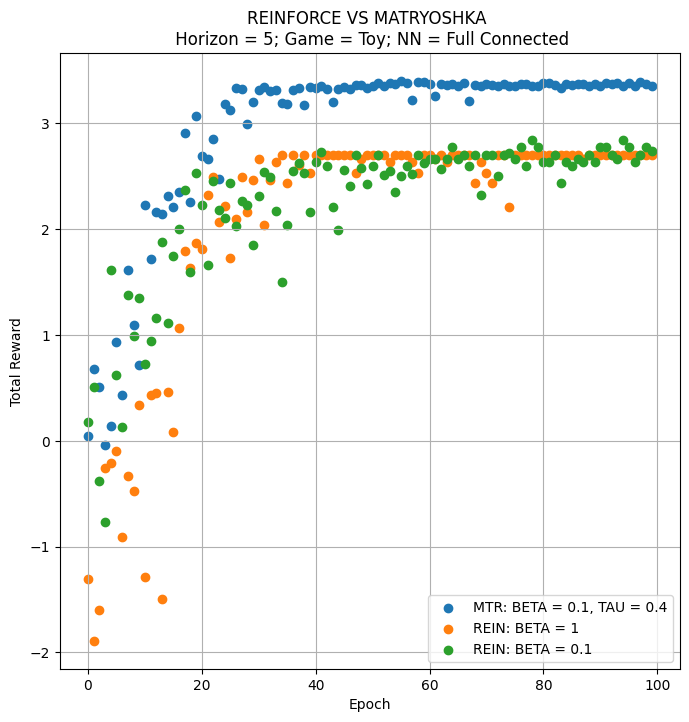

In [24]:
"""
        COMPARE REINFORCE VS MTR
        Remark: Run if you have trained both: Reinforce and Matryoshka.
"""
"""-------------------------------------------------------------------"""
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(1,1,1)
ax1.scatter(range(len(loss_list_mtr)),loss_list_mtr, label=f"MTR: BETA = {BETA_MTR}, TAU = {agent.tau}")
ax1.scatter(range(len(loss_list_1)),loss_list_1, label=f"REIN: BETA = {BETA_REIN_1}")
ax1.scatter(range(len(loss_list_1)),loss_list_2, label=f"REIN: BETA = {BETA_REIN_2}")
ax1.set_title(f"REINFORCE VS MATRYOSHKA \n Horizon = {HORIZON_MTR}; Game = {GAME_NAME}; NN = Full Connected")
ax1.set_ylabel("Total Reward")
ax1.set_xlabel("Epoch")
ax1.grid()
ax1.legend()
plt.savefig(f'images/{GAME_NAME}_1.jpg', format='jpeg')
plt.show()

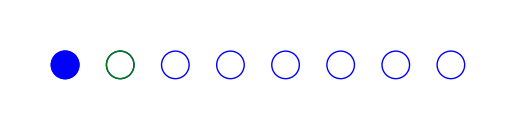

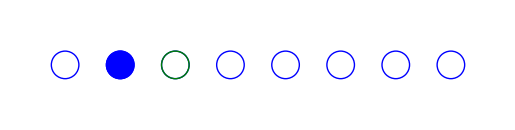

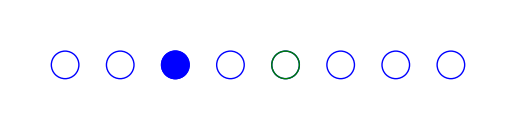

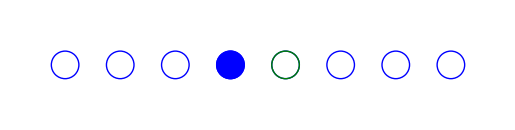

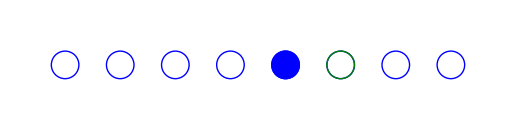

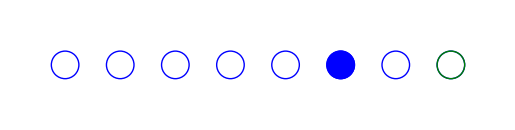

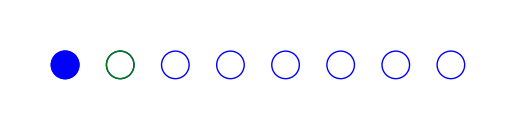

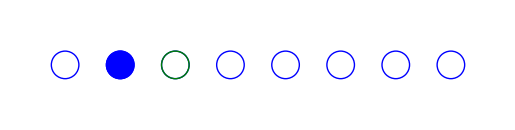

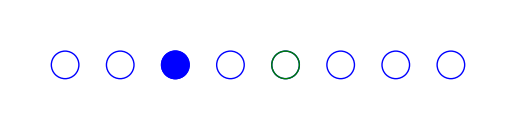

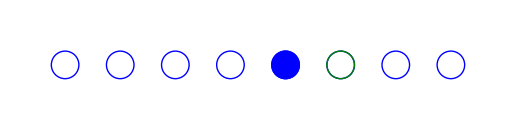

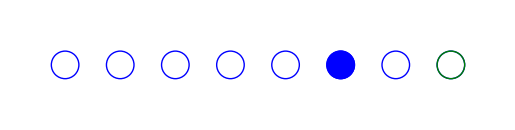

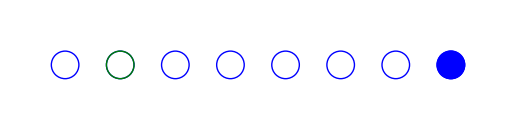

In [16]:
"""
        TEST AGENT REINFORCE
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent1,env, NUMBER_OF_EPISODES)
render(agent2,env, NUMBER_OF_EPISODES)

In [4]:
env.q_star_1

array([[ 0.5, -0.5],
       [ 1. , -1. ],
       [-1. ,  1. ],
       [ 2. , -2. ],
       [ 0.2, -0.2],
       [-0.7,  0.7],
       [ 1. , -1. ],
       [-0.2,  0.2]])

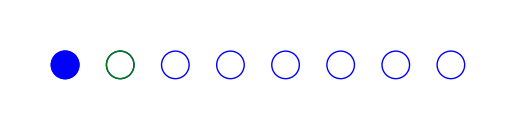

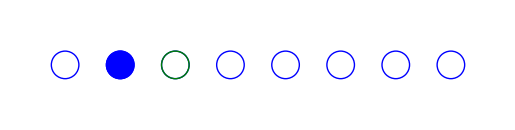

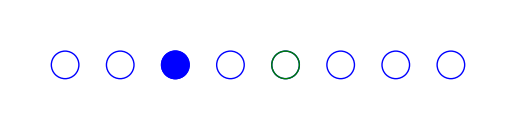

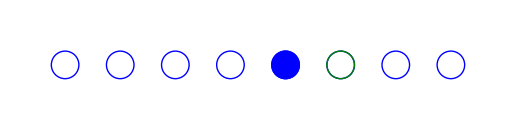

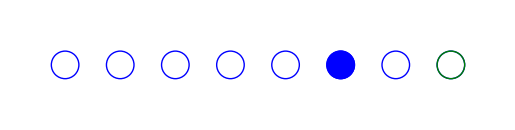

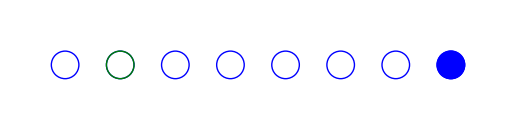

In [6]:
"""
        TEST AGENT MATRYOSHKA
"""
NUMBER_OF_EPISODES = 1
"""-------------------------------------------------------------------"""
from enviroment import render
render(agent,env,NUMBER_OF_EPISODES)

In [ ]:
"""
        TRAINING (REINFORCE) PARALLEL
        Remark: NOT WORKING, in process...
"""

LEARNING_RATE = 0.01
NUM_EPOCHES = 30
N_EPISODES = 20 # ^number of episodes per epoch
"""-------------------------------------------------------------------"""
import torch.optim as optim
from try_grad_policy import train_policy
import multiprocessing

optimizer = optim.Adam(policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer
optimizer_ntk = optim.Adam(ntk_policy.parameters(), lr=LEARNING_RATE)  # Define the optimizer


initialize_env(env)

output_queue1 = multiprocessing.Queue()
output_queue2 = multiprocessing.Queue()
run_process1 = multiprocessing.Process(target=run_episodes, args=(policy, env,output_queue1, N_EPISODES))
run_process2 = multiprocessing.Process(target=run_episodes, args=(ntk_policy, env,output_queue2, N_EPISODES))


# Train for a number of epochs
for epoch in range(NUM_EPOCHES ):
    run_process1.start()  # Collect episodes
    run_process2.start()
    # Join the processes to wait for them to finish
    run_process1.join()
    run_process2.join()
    # Get the outputs from both processes
    episodes = output_queue1.get()
    ntk_episodes = output_queue2.get()
    loss = train_policy(policy, optimizer, episodes)  # Update the policy based on the episodes
    ntk_loss = train_policy(ntk_policy, optimizer_ntk, ntk_episodes)  # Update the ntk_policy based on the episodes
    print(f'Episode {epoch + 1}, Total Loss: {BETA1}={loss} and {BETA2}={ntk_loss} ')
close_env(env)
"-------------------TEST-------------------"
env = gym.make('CartPole-v1', render_mode = "human" )
run_episodes(policy, env, n_episodes=10)